# Utilisation de geopandas

Un exemple qui s'explique par lui-même...

Lecture...


C:\Users\ewalther01\AppData\Local\Temp\ipykernel_3656\2724481609.py:14: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  geoData2 = geoData.explode().reset_index()


<AxesSubplot:>

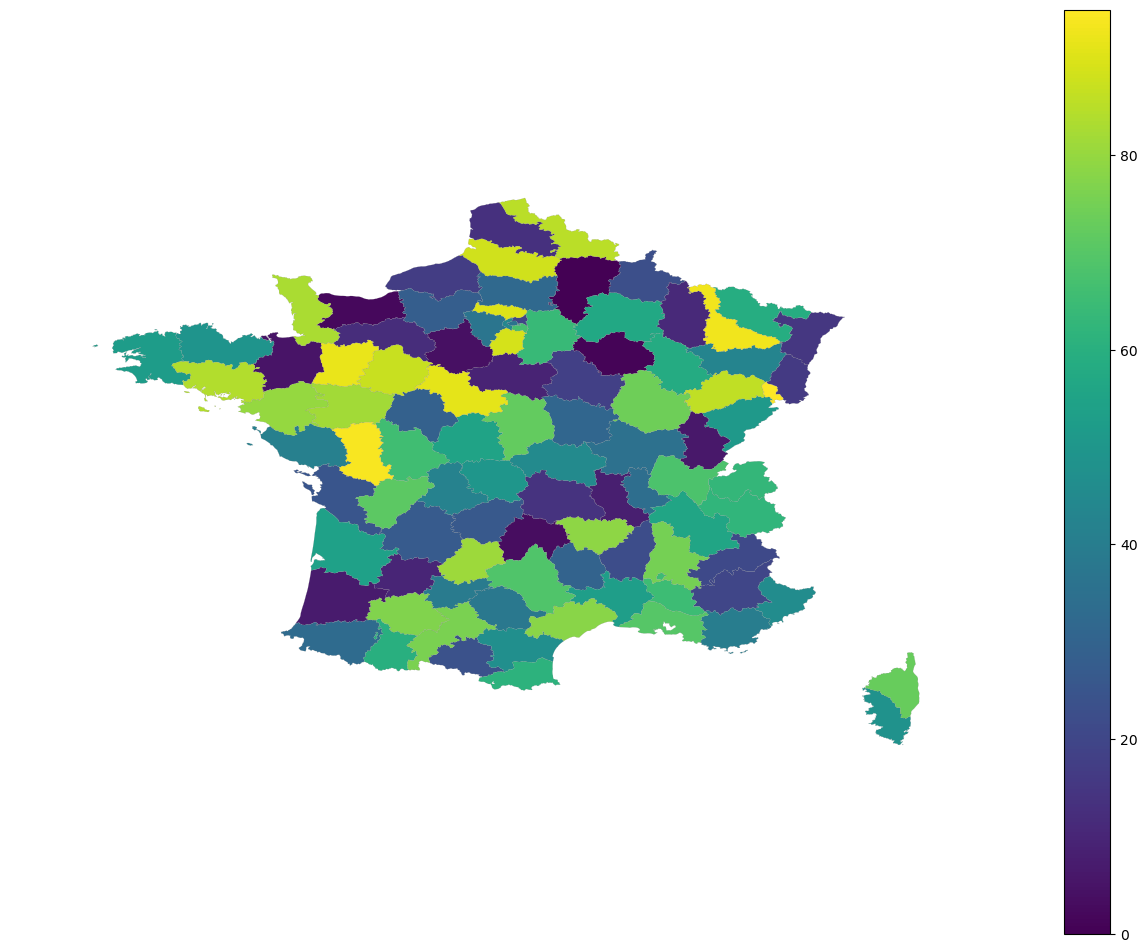

In [7]:
import geopandas as gpd
import geoplot as gplt
import numpy as np

#
# je telecharge le geojson qui m'interesse sur ce super site :
# https://france-geojson.gregoiredavid.fr/repo/departements.geojson
fichier_gjson ="./src/departements.geojson"
# il y a differents niveaux de detail (canton, commune, etc.)

print("Lecture...")
geoData= gpd.read_file(fichier_gjson)

# ensuite on remplit la donnee dans l'ordre
geoData["donnee"] = np.arange(0,len(geoData))


geoData2 = geoData.explode().reset_index()

fig, ax = plt.subplots(figsize=(16, 12))
# Map
gplt.choropleth(geoData2,
                 hue="donnee",
                 # scheme=None,
                   linewidth=.1,
                   legend=True,
                   edgecolor='grey',
                     ax=ax)
            